In [1]:
import rioxarray
import matplotlib.pyplot as plt
from pyproj import CRS, Transformer

In [ ]:
try:
    rds = rioxarray.open_rasterio(cog_url)
    print("Successfully opened the GeoTIFF from the cloud.")
    print("Data dimensions:", rds.dims)
    print("Coordinate system:", rds.rio.crs)

    # Define the bounding box coordinates (min_lon, min_lat, max_lon, max_lat) in EPSG:4326
    # min_lon_wgs84, min_lat_wgs84, max_lon_wgs84, max_lat_wgs84 = -4.136842, 52.582352, -4.049981, 52.632494
    if bbox is not None:
        min_lon_wgs84, min_lat_wgs84, max_lon_wgs84, max_lat_wgs84 = bbox
        print(f"Using passed bbox: {bbox}")
    else:
        print("No bbox passed")

    # Check the CRS of the opened raster
    raster_crs = rds.rio.crs

    # If the raster CRS is not EPSG:4326, transform the bounding box coordinates
    if raster_crs != CRS("EPSG:4326"):
        print("Transforming bbox")
        # Define the transformer from WGS84 (EPSG:4326) to the raster's CRS
        transformer = Transformer.from_crs(CRS("EPSG:4326"), raster_crs, always_xy=True)

        # Transform the bounding box coordinates
        min_x, min_y = transformer.transform(min_lon_wgs84, min_lat_wgs84)
        max_x, max_y = transformer.transform(max_lon_wgs84, max_lat_wgs84)
    else:
        print("No transformation needed")
        # If raster is already in WGS84, use the original coordinates
        min_x, min_y, max_x, max_y = (
            min_lon_wgs84,
            min_lat_wgs84,
            max_lon_wgs84,
            max_lat_wgs84,
        )

    # Clip the raster to the transformed bounding box
    rds = rds.rio.clip_box(minx=min_x, miny=min_y, maxx=max_x, maxy=max_y)
    print("Successfully clipped the GeoTIFF to the specified bounding box.")

except Exception as e:
    print(f"Failed to open or clip GeoTIFF: {e}")
    exit()

Successfully opened the GeoTIFF from the cloud.
Data dimensions: ('band', 'y', 'x')
Coordinate system: EPSG:27700
Transforming bbox
Successfully clipped the GeoTIFF to the specified bounding box.


In [4]:
nir_band = rds.sel(band=8)
red_band = rds.sel(band=4)

In [5]:
epsilon = 1e-8
ndvi = (nir_band - red_band) / (nir_band + red_band + epsilon)

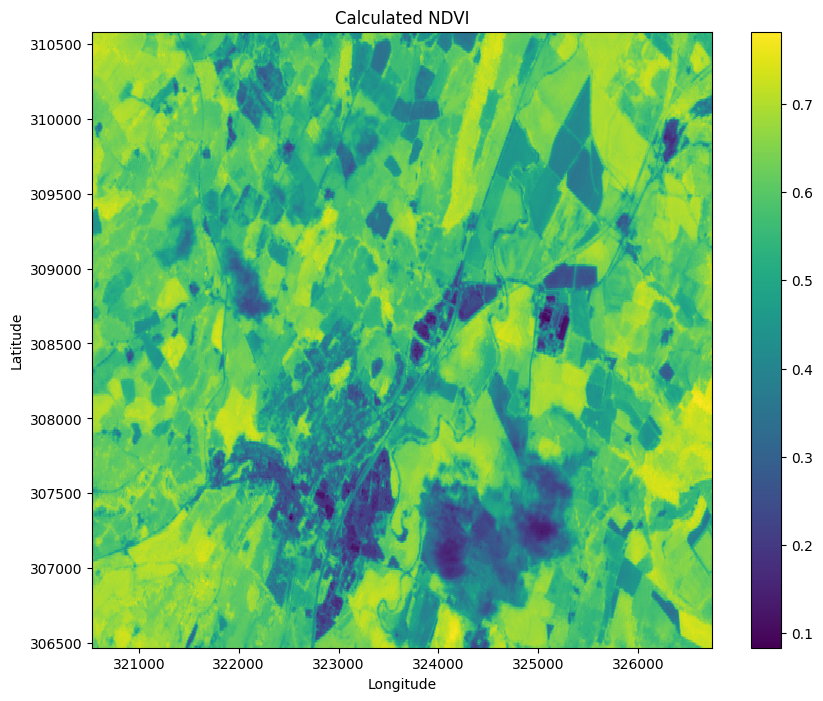

In [6]:
plt.figure(figsize=(10, 8))
ndvi.plot(cmap="viridis")  # '''viridis''' is a common colormap for NDVI
plt.title("Calculated NDVI")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()